In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from pickletools import optimize
import matplotlib.pyplot as plt

In [2]:
## Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [3]:
m = nn.Linear(n_features , 1) # input_size=1, output_size=1

loss_fct = nn.MSELoss()
optimizer = torch.optim.SGD(m.parameters(), lr=0.01)

for epoch in range(200):
    y_pred = m(X) # forward pass 
    loss = loss_fct(y_pred, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 40 == 0:
        print(f'epoch: {epoch+1}, loss:{loss.item():.4f}')   

epoch: 40, loss:1757.2028
epoch: 80, loss:514.2151
epoch: 120, loss:204.7480
epoch: 160, loss:127.4618
epoch: 200, loss:108.1133


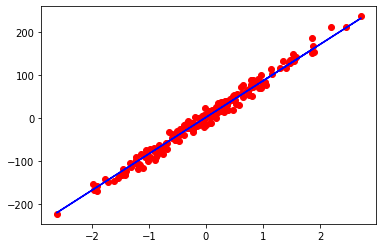

In [4]:
predicted = m(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()